In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import json
from pprint import pprint

In [2]:
source = './data_jobs.json'
with open(source, 'r') as f:
    data = json.loads(f.read())

In [3]:
df = pd.DataFrame(data['messages'])


In [4]:
from collections import Counter
results = Counter()
# df['text'] = df[df['text'].str.len()>3]['text']
df['text'] = df['text'].apply(lambda x: x if isinstance(x, str) else None)
df['text'].str.lower().str.split().apply(results.update)
results = {x:count for x, count in results.items() if len(x) > 3}

In [5]:
dates = df[['type','date','actor', 'action', 'text', 'from']]
actions = dates[['action']].drop_duplicates()
actions

,action
0,migrate_from_group
1,NaN
4,invite_members
18,remove_members
1585,pin_message
25618,group_call
32148,invite_to_group_call
34888,group_call_scheduled


In [6]:
invite_date = dates[dates['type'] == 'message']
# invite_date = dates[dates['type'] == 'service']
# invite_date = invite_date[invite_date['action'] == 'invite_members']
# invite_date = invite_date.drop_duplicates(subset=['actor'])
invite_date = invite_date.drop(columns=['type', 'action', 'text', 'actor'])
invite_date = invite_date.groupby('from').first().sort_values(by='date')

In [7]:
# df = df.dropna(subset=['from'])
text_total = df[['text']].count()
text_total

text    103328
dtype: int64

In [8]:
flooders = df[['from', 'text']].groupby(['from']).count().sort_values(by=['text'], ascending=False)

flooders = flooders.merge(invite_date, how='left', left_on='from', right_on='from')
flooders['percent'] = flooders['text'].apply(lambda x: x*100/text_total)

In [9]:
flooders[:20]

,text,date,percent
from,,,
Евгений Глотов,8063,2021-03-15T10:54:01,7.803306
T,7978,2019-02-15T18:01:26,7.721044
Старый Хрыч,6088,2019-03-05T14:31:21,5.891917
Андрей Жуков,4692,2019-01-29T20:11:40,4.540880
Сюткин,4374,2019-09-11T17:34:56,4.233122
Nik B,4068,2020-02-11T12:25:54,3.936977
Grigory Pomadchin,3385,2019-02-12T16:50:33,3.275976
Анна,2816,2020-08-18T17:45:24,2.725302
Oleg Ilinsky,2672,2019-02-15T14:55:48,2.585940


In [19]:
raw_text = df.text
print(df.text.shape)
text = ''
# for phrase in raw_text:
#     if phrase:
for line in raw_text:
    if isinstance(line, str):
        words = line.split()
        if words:
            for word in words:
                # if len(word) > 2 and word.isalpha() and 'ть' not in word.lower():
                text += f' {word.lower()} '



# text = ' '.join(' '.join([word for word in phrase if len(word) > 3]) for phrase in raw_text)
print(len(text))

(107305,)
6272185


In [20]:
print(text[:100])

 я  думаю  лучше  всем  будет,  если  обсуждать  будем  вакашки  здесь  если  кому  интересно  будет


In [13]:
stopwords_simple = set(STOPWORDS)
s_words = ["и", "в", "с", "type", "type'", "text", "text'", "bold", "bold'", 'на', 'для', 'о', "hashtag'", 'от', "или", "т", "м", "по", 'это', "про", "вот", "что", "как", "когда", "она", "чтобы", "почему", "этого", "который", "будет", "очень", "просто", "сейчас", "можно", "потому", "также", "такое", "таком", "после", "только", "может", "нужно", "которая", "сегодня", "которой", "которые", "потом", "короче", "вообще", "больше", "много", "какой", "будут", "через", "теперь", "время", "поэтому", "более", "всегда", "делать", "стоит", "своей", "тогда", "лучше", "такой", "всего", "ничего", 'свой', "самый", "мочь", "находить", "хотеть", "смотреть", "говорить", "становиться", "смочь", "наш", "кстати", "сколько", "точно"]
stopwords_simple.update(["и", "в", "с", "type", "type'", "text", "text'", "bold", "bold'", 'на', 'для', 'о', "hashtag'", 'от', "или", "т", "м", "по", 'это', "про", "вот", "что", "как", "когда", "она", "чтобы", "почему", "этого", "который", "будет", "очень", "просто", "сейчас", "можно", "потому", "также", "такое", "таком", "после", "только", "может", "нужно", "которая", "сегодня", "которой", "которые", "потом", "короче", "вообще", "больше", "много", "какой", "будут", "через", "теперь", "время", "поэтому", "более", "всегда", "делать", "стоит", "своей", "тогда", "лучше", "такой", "всего", "ничего", 'свой', "самый", "мочь", "находить", "хотеть", "смотреть", "говорить", "становиться", "смочь", "наш", "кстати", "сколько", "точно", "есть", "когда", 'если', "только", "меня", "тоже", "надо", "было", "тебя", "тебе", "быть", "буду", "была", "даже", "пока", "хочу", "типа", "него", "себя", "нет", "этот", "могу", "себе", "что-то", "нет,", "хотя", "этом", "опять", "могу", "всех"])


In [26]:
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token != " " \
              and token.strip() not in punctuation and token not in russian_stopwords]
    
    text = " ".join(tokens)
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mellolian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = preprocess_text(text)

In [21]:
text_dict = {}
for word in text.split():
    if word.lower() not in s_words and len(word) > 2:
        text_dict[word.lower()] = (text_dict.get(word.lower()) or 0) + 1
    
top_words = sorted(text_dict.items(), key=lambda x: x[1])

In [22]:
pprint(top_words[-100:])

[('каждый', 404),
 ('иногда', 405),
 ('думаю', 406),
 ('равно', 408),
 ('сделать', 409),
 ('месяц', 409),
 ('как-то', 414),
 ('туда', 414),
 ('день', 415),
 ('опыт', 423),
 ('какие', 424),
 ('этот', 429),
 ('куда', 432),
 ('пару', 433),
 ('вам', 435),
 ('либо', 449),
 ('работает', 453),
 ('хоть', 457),
 ('меньше', 460),
 ('него', 462),
 ('людей', 464),
 ('хорошо', 468),
 ('эти', 475),
 ('могут', 481),
 ('всем', 493),
 ('вопрос', 494),
 ('почти', 495),
 ('работу', 501),
 ('люди', 511),
 ('человек', 511),
 ('компании', 521),
 ('сильно', 523),
 ('себя', 526),
 ('совсем', 531),
 ('прям', 531),
 ('могу', 531),
 ('никто', 532),
 ('знаю', 545),
 ('норм', 549),
 ('не,', 556),
 ('зачем', 557),
 ('конечно', 571),
 ('дата', 576),
 ('были', 576),
 ('ну,', 578),
 ('скорее', 581),
 ('такие', 582),
 ('была', 586),
 ('год', 638),
 ('обычно', 642),
 ('работы', 647),
 ('сам', 650),
 ('этом', 658),
 ('один', 668),
 ('себе', 691),
 ('года', 700),
 ('типа', 710),
 ('под', 712),
 ('сразу', 713),
 ('всех', 7

In [23]:
top_results = sorted(results.items(), key=lambda x: -x[1])
top_results = list(filter(lambda x: x[0] not in stopwords_simple, top_results))
top_results

[('вроде', 1241),
 ('работать', 733),
 ('сразу', 713),
 ('года', 700),
 ('один', 668),
 ('работы', 647),
 ('обычно', 642),
 ('такие', 582),
 ('скорее', 581),
 ('дата', 576),
 ('были', 576),
 ('конечно', 571),
 ('зачем', 557),
 ('норм', 549),
 ('знаю', 545),
 ('никто', 532),
 ('совсем', 531),
 ('прям', 531),
 ('сильно', 523),
 ('компании', 521),
 ('люди', 511),
 ('человек', 511),
 ('работу', 501),
 ('почти', 495),
 ('вопрос', 494),
 ('всем', 493),
 ('могут', 481),
 ('хорошо', 468),
 ('людей', 464),
 ('меньше', 460),
 ('хоть', 457),
 ('работает', 453),
 ('либо', 449),
 ('пару', 433),
 ('куда', 432),
 ('какие', 424),
 ('опыт', 423),
 ('день', 415),
 ('как-то', 414),
 ('туда', 414),
 ('сделать', 409),
 ('месяц', 409),
 ('равно', 408),
 ('думаю', 406),
 ('иногда', 405),
 ('каждый', 404),
 ('мало', 396),
 ('именно', 393),
 ('спасибо', 391),
 ('таких', 380),
 ('другой', 378),
 ('писать', 375),
 ('выше', 373),
 ('того', 368),
 ('данных', 367),
 ('свои', 364),
 ('data', 361),
 ('значит', 361),


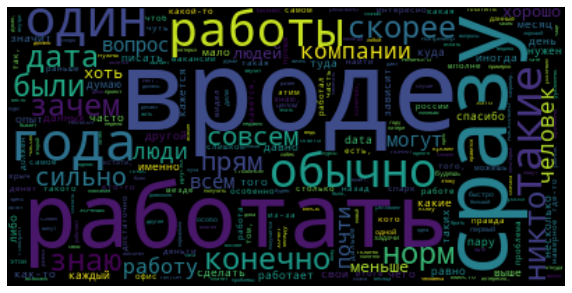

In [24]:
wordcloud = WordCloud(stopwords=stopwords_simple, max_words=1000).generate_from_frequencies(dict(top_results))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()